Zomato Data Analysis Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Zomato data .csv")
print(df)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [3]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


Convert Data Type of Column - Rate?

In [5]:
def handleRate(value):
        value=str(value).split('/')
        value=value[0];
        return float(value)

df['rate']=df['rate'].apply(handleRate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [6]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Type of Restaurant')

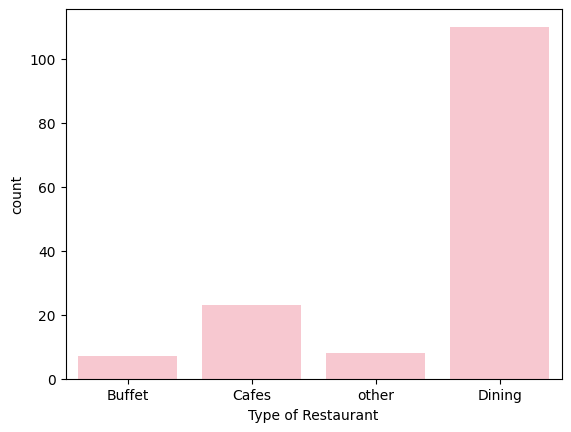

In [7]:
sns.countplot(x=df['listed_in(type)'],color='pink')
plt.xlabel('Type of Restaurant')

Conclusion- Majority of the Restaurant falls in Dining Category.

Text(0.5, 1.0, 'Restaurants')

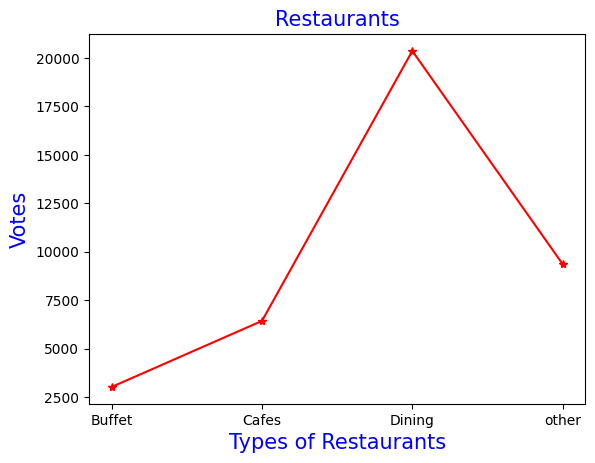

In [8]:
grp_data=df.groupby('listed_in(type)')['votes'].sum()
res=pd.DataFrame({'votes': grp_data})
plt.plot(res, c='red',marker="*")
plt.xlabel("Types of Restaurants",c="blue",size=15) 
plt.ylabel('Votes',c="blue",size=15)
plt.title("Restaurants",c="blue",size=15)

Conclusion- Dining Restaurant has Received Maximum Votes.

plt.hist(df['rate'],bins=5,color='magenta')
plt.title("Rating Distribution")
plt.show()

Conclusion- The Majority Restaurants Received Ratings from 3.5 to 4.

Average Order Spending by Couples?

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

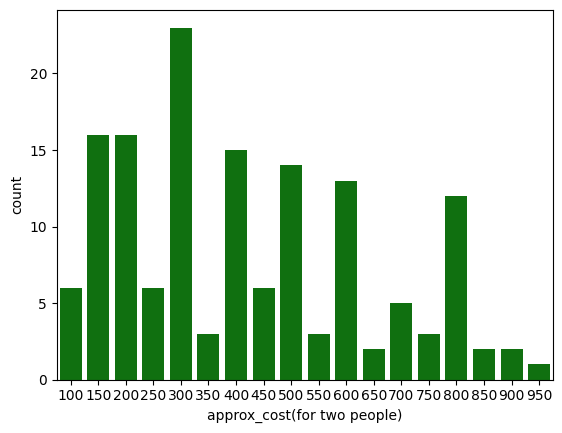

In [14]:
cpl_data=df['approx_cost(for two people)']
sns.countplot(x=cpl_data,color='green')

Conclusion- The Majority of Couples prefer Restaurant with an approximate cost of 300 rupees.

Which Mode Receives Maximum Rating?

<Axes: xlabel='online_order', ylabel='rate'>

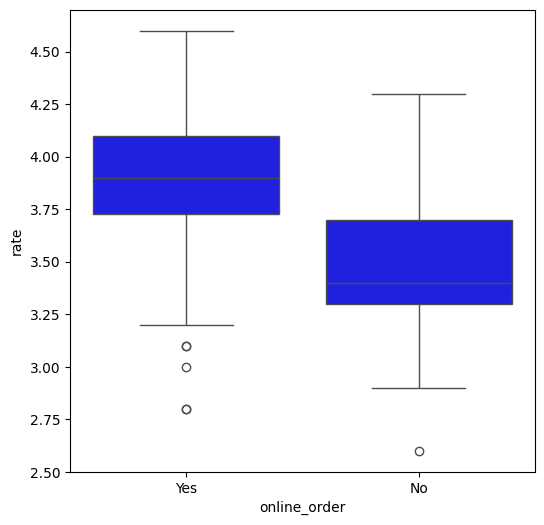

In [17]:
plt.figure(figsize= (6,6),)
sns.boxplot(x= 'online_order', y= 'rate', data= df, color='blue')

Conclusion: Offline Order received lower rating in comparison to online order

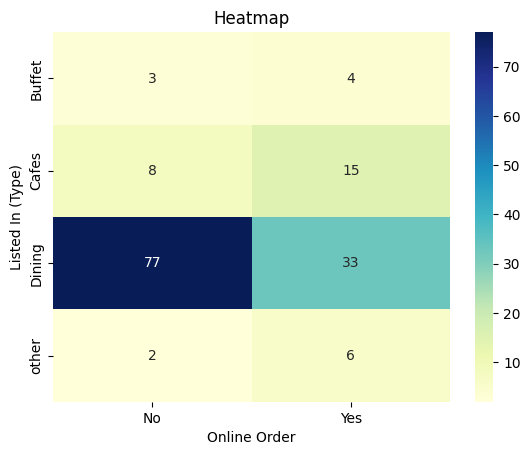

In [20]:
pivot_table = df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title("Heatmap")
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()

Conclusion- Dining Restaurant primarily accepts Offline Orders, Where as Cafes primarily received Online Orders. This suggests that Clients prefer offline order in person at restaurants, But prefer Online orders at Cafes.